## 결정트리(Decision Tree)
---
- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러 개의 DT가 모여서 사용됨 ==> 앙상블
- yes/no로 분류되기 때문에 전처리가 필요 없음

In [1]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree  # 트리 시각화 함수
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### [1] 데이터 로딩

In [2]:
# numpy => DataFrame 형태로 데이터 로딩
# numpy로 안 넣으면 predict 할 때 warning이 뜸
dataX, datay=load_breast_cancer(as_frame=True, return_X_y=True)

In [3]:
type(dataX), type(datay)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [4]:
dataX.info(), '\n', dataX.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None,
 '\n',
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'))

In [5]:
dataX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
dataX.values  # ndarray 형태

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### [2] 학습 & 테스트 데이터 분리

In [7]:
# stratify = 라벨 즉 타겟 데이터 지정 : 학습 & 테스트 데이터에도 비율 맞추기
train_X, test_X, train_y, test_y=train_test_split(
dataX, datay, stratify=datay, random_state=42, test_size=0.2)

# train_test_split( dataX.to_numpy(), datay.to_numpy() )로 넣어도 됨

In [8]:
print(f'train_X : {train_X.shape}, test_X : {test_X.shape}')

train_X : (455, 30), test_X : (114, 30)


### [3] 학습
---
- DecisionTreeClassifier 학습 방법

In [9]:
# 모델 객체 생성
dtModel=DecisionTreeClassifier()

In [10]:
# 학습용 데이터로 학습 진행
# .values : numpy형태
dtModel.fit(train_X.values, train_y.values)

DecisionTreeClassifier()

### [4] 평가

In [11]:
train_score=dtModel.score(train_X, train_y)
test_score=dtModel.score(test_X, test_y)

print(f'train_score => {train_score}, test_score => {test_score}')
# train_score가 1이라서 과적합

train_score => 1.0, test_score => 0.9298245614035088


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### DTree 시각화
---
- plot_tree()

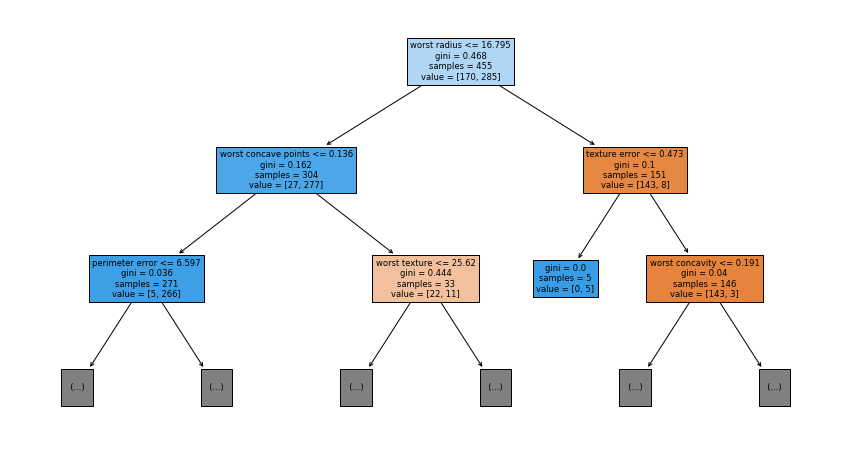

In [12]:
plt.figure(figsize=(15, 8))
plot_tree(dtModel, max_depth=2, filled=True, feature_names=dataX.columns)
#plt.savefig('tree.png')   # 현재 figure에 있는 그래프 파일로 저장
plt.show()

## 모델 속성 확인
---
- DT에서속성들 중에서 속성의 중요도를 감지 가능
- feature별로 특성들의 중요도 값
- 모든 값을 합치면 1

In [13]:
print(dtModel.feature_importances_.max())
print(dtModel.feature_importances_.argmax())

0.6978111384066753
20


In [24]:
dtModel.feature_importances_

array([0.        , 0.01126935, 0.        , 0.        , 0.01267802,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05892148, 0.0090813 , 0.00300348, 0.00928306,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.69781114, 0.04009891, 0.        , 0.        , 0.        ,
       0.        , 0.01632512, 0.12453469, 0.01073271, 0.00626075])

---

### RandomForest 학습 모델
---
- 100개 DecisionTree 모델
- 중복허용된 랜덤 샘플 데이터 + DecisionTree 모델

In [14]:
# oob_score : 중복허용랜덤샘플에 포함되지 않은 데이터 
# => 검증용으로 사용
forestModel=RandomForestClassifier(max_depth=5, oob_score=True)

In [15]:
forestModel.fit(train_X, train_y)

RandomForestClassifier(max_depth=5, oob_score=True)

In [16]:
# 모델 학습 후 속성 ------------------
print(f'classes_ : {forestModel.classes_}')

classes_ : [0 1]


In [17]:
print(f'base_estimator_ : {forestModel.base_estimator_}')

base_estimator_ : DecisionTreeClassifier()


In [18]:
# oob_score=True로 주고 난 이후
# 이 데이터는 훈련에 아예 사용 안 됨
forestModel.oob_score_

0.9626373626373627

In [19]:
bestModel=forestModel.base_estimator_

In [20]:
## 평가
train_score=forestModel.score(train_X, train_y)
test_score=forestModel.score(test_X, test_y)

In [21]:
train_score, test_score

(0.9934065934065934, 0.956140350877193)

In [22]:
# 특성 중요도 저장 속성 그래프 출력
forestModel.feature_importances_

array([0.03523458, 0.01119873, 0.02696668, 0.06356767, 0.0082054 ,
       0.01726887, 0.04133227, 0.09007122, 0.00310059, 0.00213682,
       0.00769125, 0.00535996, 0.01649547, 0.03072698, 0.00367882,
       0.00362347, 0.00412613, 0.00344659, 0.00176187, 0.00306118,
       0.10030526, 0.01697004, 0.11072094, 0.16707248, 0.01115457,
       0.02326378, 0.03841863, 0.139303  , 0.00955892, 0.00417785])

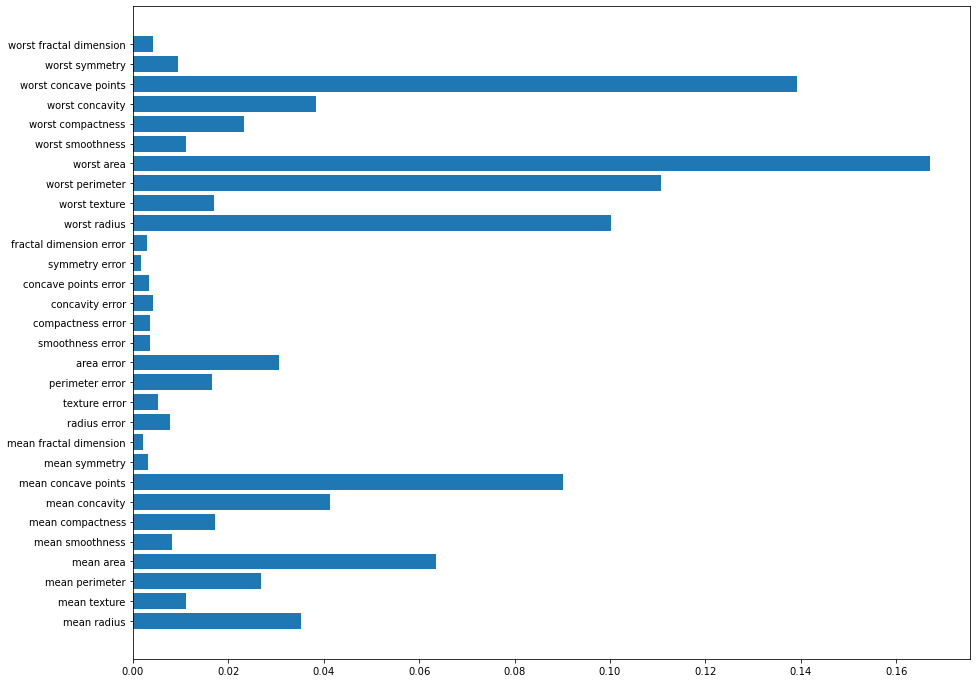

In [23]:
plt.figure(figsize=(15, 12))
plt.barh(y=dataX.columns,
    width=forestModel.feature_importances_)
plt.show()